# **DCKAP Assignment**

Prepared by : Pradeepa P

Email : pradeepadhanam50@gmail.com

<h2><b>Principle Component Analysis  (PCA)</h2>

<b>Explanation :</b>    
<br>
Principle Component Analysis or PCA is a Unsupervised dimensionality reduction method that is often used to reduce the number of dimensions or the number of features into some other dimension.So basically lower number of dimensions.It is not an machine learning algorithm , unless it is a statistical technique that reduces the dimension of features present in the dataset without any data redundancy.In simple way, Suppose if we have 200 features,we don't give these 200 features directly into our machine learning algorithm.If we try to do that then the accuracy will be very less.As the number of dimension is increased then my accuracy will be decreased.What we will do if we have more number of features?? Here PCA comes into the pictures.If I apply the PCA in our features then you can reduce those number of dimension into a smaller number of dimensions then we will use those features into our machine learning algorithm. The working of PCA was explained in an intuitive level here:

####**Explaining the intution with simple Data**

<font color="Green">Given the following data,use PCA to reduce the dimension from 2 to 1

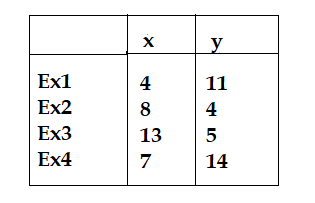

#####<font color="Green">**Step-1**   Calculate the n and N
#####<font color="Green">**Step-2**   Computation of mean of variables
#####<font color="Green">**Step-3**   Computation of covariance matrix x,y


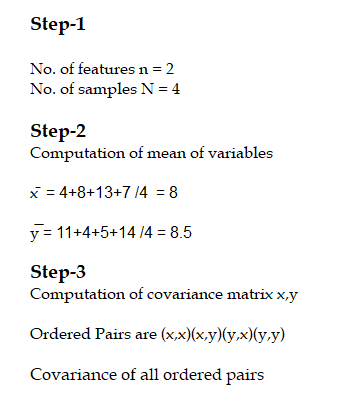

#### <font color="green">**I) Covariance of all ordered Pairs**

#####**To find** -Cov(x,x) ,Cov(x,y) , Cov(y,x)  ,Cov(y,y)


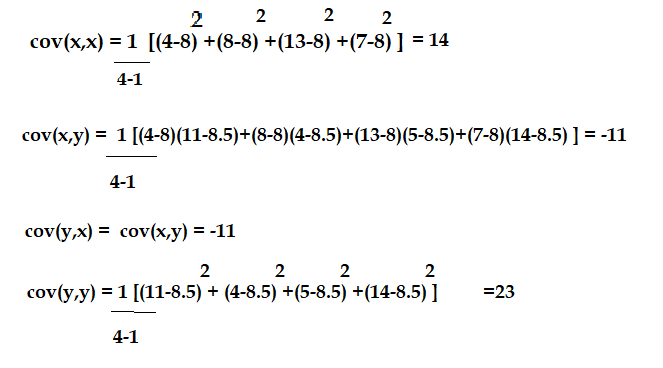

####<font color="Green"> **II) Using all the covariance value we are going to construct a covariance matrix  - 2X2**
<br>

 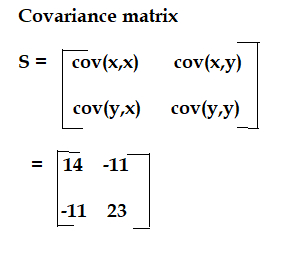

#### <font color="Green"> **From the above covariance matrix we have to construct** 
1.  Eigen value
2.  Eigen Vector
3.  Normalized Eigen Vector<br>



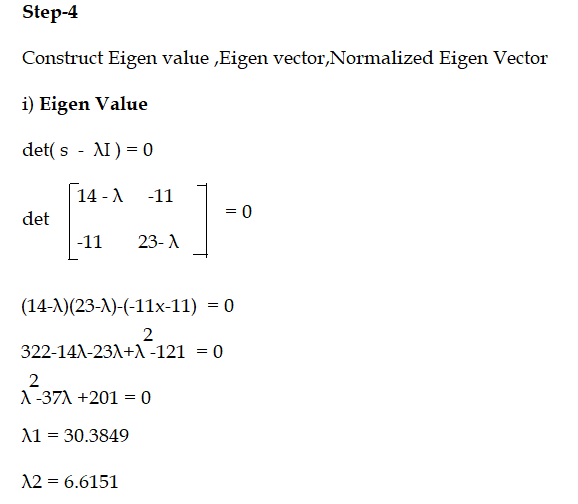

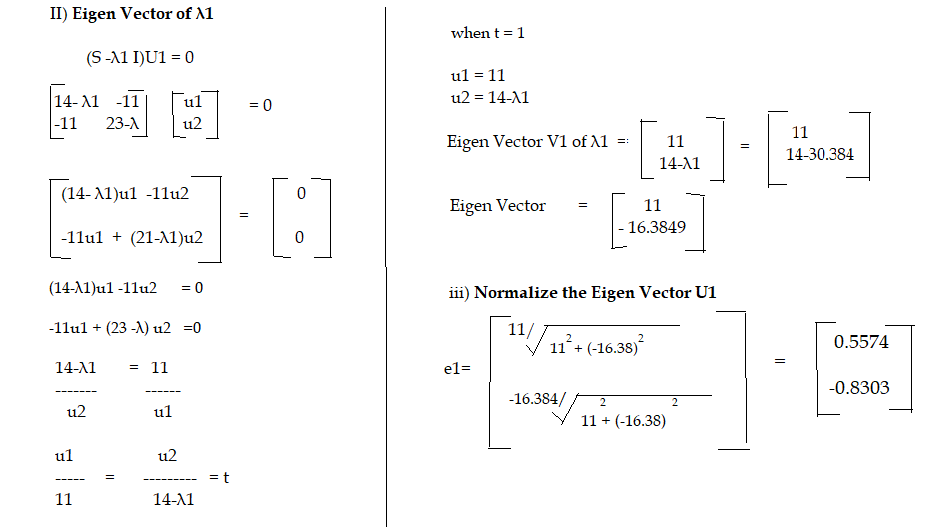

#### <font color="green">**Derive New Dataset**

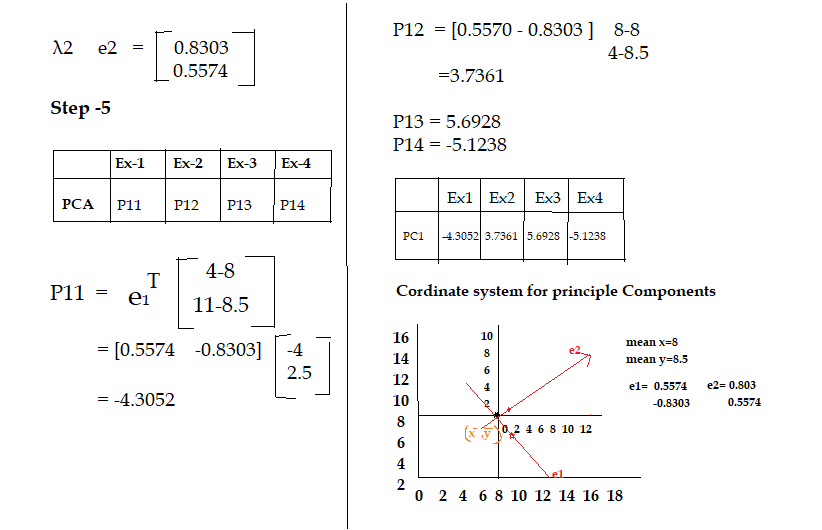

###<font color="green">**Reduced two dimension into one dimension**

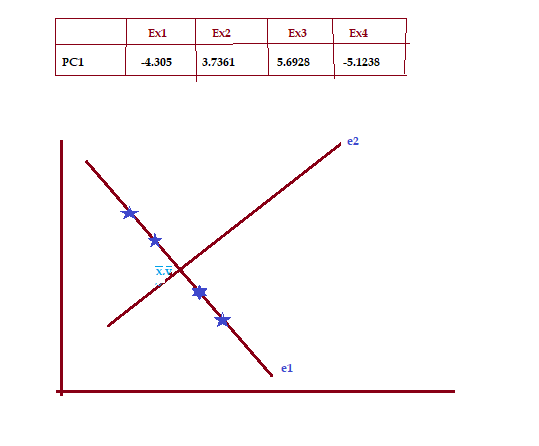

<h2><b>PCA Implementation</b></h2>

Importing the required libraries

In [ ]:
import numpy as np #Importing numpy.
import pandas as pd #Importing pandas for loading the dataframe
import matplotlib.pyplot as plt #Importing matplotlib for making visualizations.

###**Read the data with the help of Pandas**

In [ ]:
data=pd.read_csv('/content/IRIS.csv') #load the iris data with the help of pandas
data.head()  #display first 5 rows in the iris dataset.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape # display the rows and columns of the iris data

(150, 5)

In [ ]:
data.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data['species'].value_counts()  #The function returns object containing counts of unique values. The resulting object will be descending order.First element is the most frequent one
# n refers to number of samples of each category
#Iris-versicolor(n=50)
#Iris-setosa  (n=50)
#Iris-virginica (n=50)

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

We need to perform PCA which will helps us in obtaining an generalized model. so that it will gives us an good prediction with better accuracy.

In [ ]:
#seperating dependent and independent feature
X=data.iloc[:,:-1].values #Except last column all other columns are independent features
y=data['species'].values # Dependent feature (target variable)

###**Feature Scaling -- Standardization**



Standardization helps you to scaled down the feature based on standard normal distribution(where mean=0 and std=1)

In [ ]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)        #z=x-mean/std   

###**Correlation matrix of the data**

In [ ]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

In [ ]:
X_corr # To find the pairwise correlation of all columns in the dataframe.

array([[ 1.62803614, -0.26018991,  0.50483818, -1.25144671],
       [-0.26018991,  0.09099476, -0.11302434,  0.20804899],
       [ 0.50483818, -0.11302434,  0.81593818,  0.15899943],
       [-1.25144671,  0.20804899,  0.15899943,  1.46503093]])

###**Finding the eigen values and eigen vectors**

In [ ]:
# It will return both eigen value and eigen vector
eigen=np.linalg.eig(X_corr)  #return eigen value - λ1, λ2, λ3, λ4
eigen

(array([2.87814137, 1.06028326, 0.00737622, 0.05419914]),
 array([[ 0.73455716, -0.2478496 , -0.49971986, -0.38636305],
        [-0.12286134,  0.0649007 ,  0.46373462, -0.8750104 ],
        [ 0.13618763, -0.8461696 ,  0.4846068 ,  0.17494621],
        [-0.65328692, -0.46728522, -0.54807528, -0.23339713]]))

In [ ]:
#To check whether correct eigen-values are correctly computed.
print('Sum of eigen-values:',round(np.sum(eigen[0])))

Sum of eigen-values: 4


Here we are reducing 4-dimensinal feature space to a 2 dimensional feature subspace,by choosing top2 eigenvectors with the highest eigen value.Here first and second eigen value are high so I'm taking those two eigen value. 

In [ ]:
print(eigen[1][:,0]) #Retrieves the first dimension from the eigen-vector.
matrix_w=np.hstack((eigen[1][0].reshape(4,1),eigen[1][1].reshape(4,1))) #Retrive the first and second dimension from the eigen vector and reshaping into 4x1 

[ 0.73455716 -0.12286134  0.13618763 -0.65328692]


In [ ]:
matrix_w

array([[ 0.73455716, -0.12286134],
       [-0.2478496 ,  0.0649007 ],
       [-0.49971986,  0.46373462],
       [-0.38636305, -0.8750104 ]])

###**Projection onto the new feature space**

In [ ]:
Y=X.dot(matrix_w) #performing dot product

### **Visualizing PCA using matplotlib**

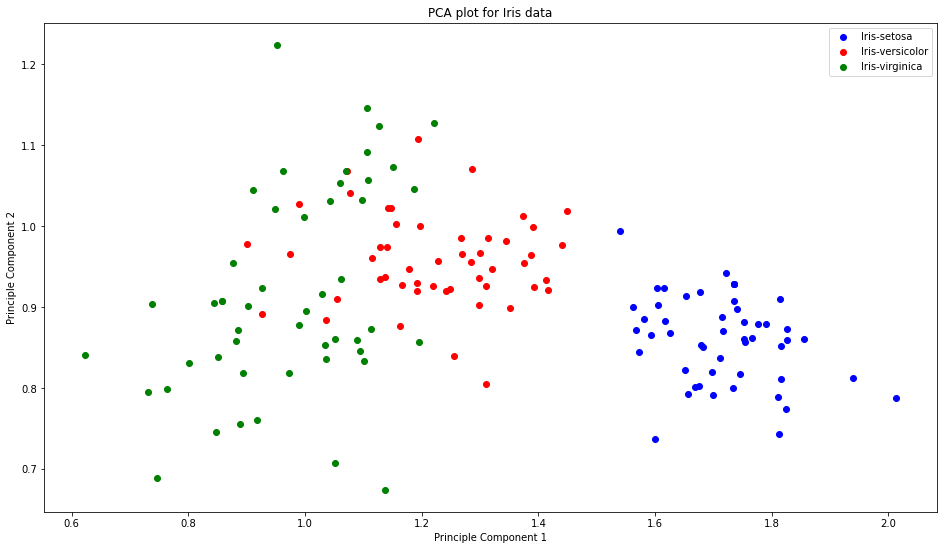

In [ ]:

plt.figure(figsize=(16,9)) # To change the width and height of the image
for lab,col in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),('blue','red','green')):
  plt.scatter(Y[y==lab, 0],
              Y[y==lab, 1],
              label=lab,
              c=col)
plt.xlabel('Principle Component 1') # X-axis  title
plt.ylabel('Principle Component 2') # y-axis title
plt.legend(loc='best')  # describing the elements of the graph
plt.title('PCA plot for Iris data') #Graph Title
plt.show()

##**MNIST Dataset**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

###**Data Preprocessing**

In [ ]:
mnist_data=pd.read_csv('mnist_data.csv') #Loading the MNISTdata using pandas.

In [ ]:
mnist_data.head(3) # display first three rows in the mnist dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist_data.shape    #Rows and Columns  

(33844, 785)

In [ ]:
mnist_data.info() #summary of the Mnist dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Columns: 785 entries, label to pixel783
dtypes: float64(698), int64(87)
memory usage: 202.7 MB


####**Independent and Dependent Features**

In [ ]:
X=mnist_data.iloc[:,1:].values #Independent Features.
y=mnist_data['label'].values  #Dependent Features.

In [ ]:
X.shape   #rows and columns(28x28 pixel =784)

(33844, 784)

####Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split #Importing train_test_split from scikit-learn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into train and test

###**Feature Scaling**
 
####Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler from sklearn package
normalize=MinMaxScaler() #Initializing the MinMaxScaler class.
X_train=normalize.fit_transform(X_train) #Fitting and transforming the training data using MinMaxScaler.
X_test=normalize.transform(X_test) #Transforming the test data using MinMaxScaler.

For better visualization this 784 pixels input data was reshaped into 28*28 pixel

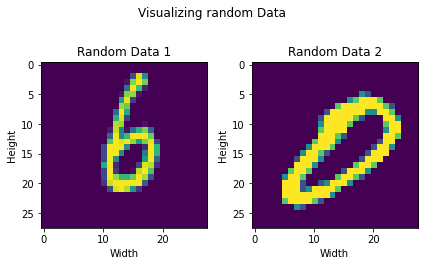

In [ ]:
plt.subplot(1,2,1) # first plot in the subplot.
plt.imshow(X_train[0].reshape(28,28))   #Here X[0].shape is  (784,)  reshaping 784 pixels into (28*28)pixels
plt.xlabel('Width') #Giving name to X axis (1st plot) .
plt.ylabel('Height') #Giving name to Y axis(1st plot).
plt.title('Random Data 1')#Assigning title to the first plot
plt.subplot(1,2,2) # second plot in the subplot.
plt.imshow(X_train[9].reshape(28,28))   #Here X[0].shape is  (784,)  reshaping 784 pixels into (28*28)pixels
plt.xlabel('Width') #Giving name to X axis(2nd plot) .
plt.ylabel('Height') #Giving name to Y axis(2nd plot) .
plt.suptitle('Visualizing random Data')
plt.title('Random Data 2')#Assigning title to the second plot
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()